In [3]:
import numpy as np
from matplotlib import pyplot as plt

from rustic.utils import generate_bezier, generate_wave

In [4]:
FROM = 1.0
TO = 1.0
DURATION = 2.0
CONTROL = (1.0, 4.0)


curve = lambda x: generate_bezier(x, FROM, TO, DURATION, CONTROL)

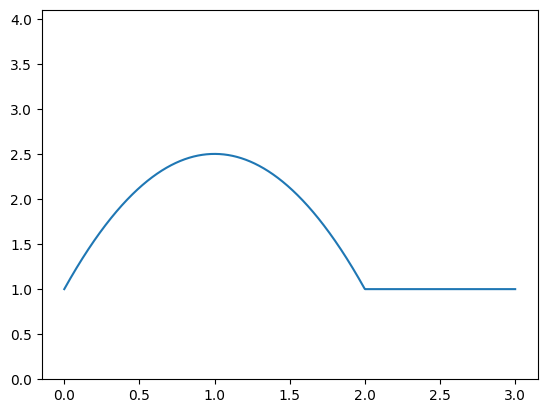

In [7]:
space = np.linspace(0.0, 3.0, 3 * 44100)

bezier_values = [curve(time) for time in space]
plt.plot(space, bezier_values)
ax = plt.gca()
ax.set_ylim([0.0, max(FROM, TO, CONTROL[1]) + 0.1])
plt.show()

In [8]:
class Generator:
    def __init__(self, freq: float, shape: str = "sine"):
        self.frequency = freq 
        self.shape = shape

    def get_at(self, time: float, warp: float = 1.0) -> float:
        match self.shape:
            case "sine":
                return np.sin(2 * np.pi * self.frequency * time)
            case "square":
                return np.sign(np.sin(2 * np.pi * self.frequency * time))
            case "sawtooth":
                return 2 * (self.frequency * time - np.floor(self.frequency * time + 0.5))
            case "triangle":
                return 2 * np.abs(2 * (self.frequency * time - np.floor(self.frequency * time + 0.5))) - 1
            case _:
                raise ValueError(f"Invalid shape: {self.shape}")


In [9]:
def act_time(t: float) -> float:
    der = lambda t: (t ** 3 / 3.0) * (FROM - CONTROL[1] + TO) + (t ** 2) * (-FROM + CONTROL[1]) + t * FROM
    
    if t <= DURATION:
        t /= DURATION
        return der(t)
    else:
        return t - DURATION + der(1.0)

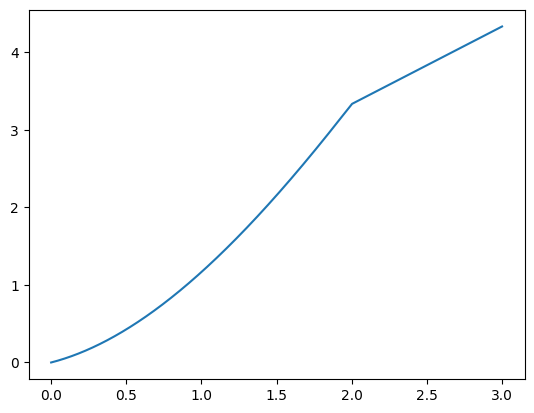

In [10]:
act_time_values = [act_time(time) for time in space]
plt.plot(space, act_time_values)
plt.show()

In [11]:
print(act_time(1.99))
print(act_time(2.0))
print(act_time(2.01))

3.3083584166666666
3.3333333333333335
3.3433333333333333


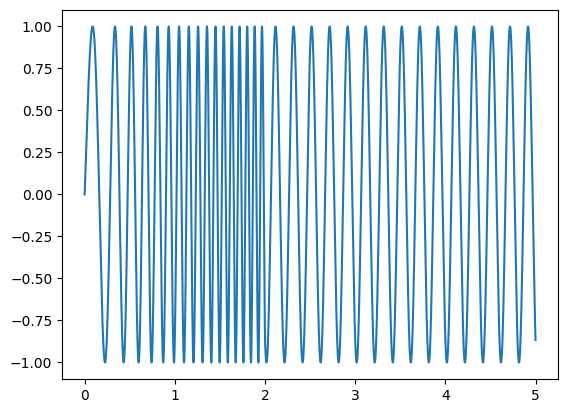

In [12]:
sine_gen = Generator(freq=5)

space = np.linspace(0.0, 5.0, 5 * 44100)
new_sine = [sine_gen.get_at(act_time(time)) for time in space]
plt.plot(space, new_sine)
plt.show()